In [1]:
#Importing needed libraries for transforming the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import itertools
import re
from collections import Counter
%matplotlib inline
pd.set_option("display.max_row",500)
pd.set_option("display.max_column",500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_json('train.json')
#Creating a column that counts the number of ingredients in the recipe
train['number'] = [len(i) for i in train['ingredients']]
train.head()

,cuisine,id,ingredients,number
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


In [3]:
train_copy = train.copy()
print(train_copy.shape)

(39774, 4)


We will try to search for similarities between cuisines and try to prove the hypothesis that cuisines types can be grouped together based on the types of ingredients their recipes use. For this we will extract each individual ingredient, increasing the rows in the dataset to 428,275 and group them into one or several of the following
categories:

- Redmeat: Beef, veal and lamb meat and derivatives
- Poultry: domestic fowls, including chickens, turkeys, geese and ducks and their derivatives (ig.eggs)  
- Pork: All meat derived from pigs and their derivatives (ig.ham)
- Seafood: All sea related products and their derivatives
- Dairy: All milk related products and its derivatives (ig. cheese)
- Vegetables: All non fruit products and derivatives
- Fruits: All fruit products
- Spices: All ground products(excluding the meat products), products considered to be spices and salt.
- Hot: All products that can be considered to by spicy (ig. habanero, hot sauce, ground)
- Nuts: All seed and nut products and its derivatives (ig. almond milk, seeds)
- Sweets: All products considered to have a sweet taste and sugar (ig. chocolate, nutella)
- Alcohol: All products containing alcohol (ig. rum, vodka, beer)
- Others: Products such as rice, vinegear, oils, quinoa, dressings

After categorization we will reshape the dataframe back to its original size with 39,774 rows and try out a dimensionality reduction algorithm (PCA) to visualize the dataset. 

In [4]:
#List of all the cuisines in dataframe includung duplicates, for use in expanding the dataframe
cuisines_list = train_copy.cuisine.tolist()

#List of lists of recipes in the dataframe
recipes = train_copy.ingredients.tolist()

#Counting the number of ingredients in each recipe, for use in expanding dataframe 
len_recipe = []
def len_list():
    for recipe in recipes:
        len_recipe.append(len(recipe))
len_list()

#list of individual ingredients
ingredients = list(itertools.chain.from_iterable(train_copy.ingredients.tolist()))
len(ingredients)

428275

In [5]:
#With this code we attach the ingredient to the cuisine and recipe it belongs to.  
cuisines_list_increased = sum([[cuisine] * lenrec for cuisine, lenrec in zip(cuisines_list, len_recipe)], [])

#This is the transformed dataframe where each individual ingredient is listed along with its cuisine. 
zip_cuisines = list(zip(cuisines_list_increased, ingredients))
df_zc = pd.DataFrame(zip_cuisines, columns = ['Cuisine', 'Ingredient']) 
df_zc.head()

,Cuisine,Ingredient
0,greek,romaine lettuce
1,greek,black olives
2,greek,grape tomatoes
3,greek,garlic
4,greek,pepper


## Categories:
Note: Some categories will have to undergoe some cleaning on themselves. For example, red meat groups includes steaks, however the dataset includes fish steaks, pork steaks other nonbeef steaks, which should be removed, reducing noise in each of the categories.

### Redmeat Category

In [6]:
#Extracting steak related ingredients for cleaning

steaks = list(set(df_zc[(df_zc.Ingredient.str.contains('steak', regex=False, case=False,)) 
                 ]['Ingredient'].tolist())) 
print((steaks),len(steaks))

['bone-in ribeye steak', 'flat iron steaks', 'pork blade steaks', 'new york strip steaks', 'boneless sirloin steak', 'beef steak', 'leftover steak', 'calamari steak', 'lamb leg steaks', 'steak tips', 'steak fillets', 'ahi tuna steaks', 'shoulder steak', 'montreal steak seasoning', 'blade steak', 'beef tenderloin steaks', 'halibut steak', 'boneless beef rib eye steaks', 'boneless steak', 'tri-tip steak', 'fresh tuna steaks', 'braising steak', 'skirt steak', 'eye of round steak', 'rump steak', 'filet mignon steaks', 'steak sauce', 'chuck steaks', 'swiss steak', 'hanger steak', 'shark steak', 'salmon steaks', 'shell steak', 'fat-trimmed beef flank steak', 'strip steaks', 'beef rump steaks', 'flank steak', 'beefsteak tomatoes', 'top loin steaks', 'turkey breast steaks', 'tuna steaks', 'lamb steaks', 'boneless beef round steak', 'top round steak', 'cube steaks', 'topside steak', 'minced lean steak', 'lean steak', 'round steaks', 'strip loin steak', 'steak seasoning', 'sirloin steak', 'venis

In [7]:
#Removing 10 steak ingredients unrelated to beef 

removed_steaks =['shark steak','halibut steak','fish steaks','fresh tuna steaks',
                 'salmon steaks','calamari steak','swordfish steaks','tuna steaks','ahi tuna steaks'
                 'pork blade steaks',
                 'turkey breast steaks'] 
steaks = [steak for steak in steaks if not any(notbeef in steak for notbeef in removed_steaks)]
print((steaks),len(steaks))

['bone-in ribeye steak', 'flat iron steaks', 'pork blade steaks', 'new york strip steaks', 'boneless sirloin steak', 'beef steak', 'leftover steak', 'lamb leg steaks', 'steak tips', 'steak fillets', 'shoulder steak', 'montreal steak seasoning', 'blade steak', 'beef tenderloin steaks', 'boneless beef rib eye steaks', 'boneless steak', 'tri-tip steak', 'braising steak', 'skirt steak', 'eye of round steak', 'rump steak', 'filet mignon steaks', 'steak sauce', 'chuck steaks', 'swiss steak', 'hanger steak', 'shell steak', 'fat-trimmed beef flank steak', 'strip steaks', 'beef rump steaks', 'flank steak', 'beefsteak tomatoes', 'top loin steaks', 'lamb steaks', 'boneless beef round steak', 'top round steak', 'cube steaks', 'topside steak', 'minced lean steak', 'lean steak', 'round steaks', 'strip loin steak', 'steak seasoning', 'sirloin steak', 'venison steaks', 't-bone steak', 'sandwich steak', 'minute steaks', 'porterhouse steaks', 'fillet steaks', 'rib eye steaks', 'ham steak', 'cooked steak

In [8]:
#Extracting meat related ingredients for cleaning

meats = list(set(df_zc[(df_zc.Ingredient.str.contains('meat', regex=False, case=False,)) 
                 ]['Ingredient'].tolist())) 
print((meats),len(meats))

['meat', 'lean ground meat', 'dark meat', 'meat sauce', 'meat filling', 'meat bones', 'ground meat', 'meat stock', 'beef stew meat', 'dark turkey meat', 'frozen crabmeat, thaw and drain', 'beef boneless meat stew', 'turkey meat', 'crab meat', 'meat extract', 'roast beef deli meat', 'leftover meat', 'roast duck meat', 'pork stew meat', 'chopmeat', 'minced meat', 'chopped cooked meat', 'shoulder meat', 'stir fry beef meat', 'mincemeat', 'crabmeat', 'cooked meatballs', 'sliced meat', 'coconut meat', 'homemade meatballs', 'meatloaf', 'meatballs', 'luncheon meat', 'cured meats', 'lamb stew meat', 'cooked meat', 'sausage meat', 'meat drippings', 'italian meatballs', 'frozen meatballs', 'imitation crab meat', 'turkey meatballs', 'lobster meat', 'meat seasoning', 'taco meat', 'meat loaf mix', 'pork meat', 'chicken meat', 'meat fats', 'lump crab meat', 'meat glaze', 'meat tenderizer', 'fully cooked luncheon meat', 'mincemeat pie filling', 'meat-filled tortellini', 'meat loaf mixture', 'turkey b

In [9]:
#Removing 22 meats unrelated to beef 

removed_meats =['turkey meat','dark turkey meat','turkey meatballs','chicken meat',
                'turkey breast deli meat','roast duck meat',
                'shrimp meat','lump crab meat','lobster meat', 'crabmeat',
                 'frozen crabmeat, thaw and drain','crab meat','imitation crab meat','crabmeat frozen',
                'pork meat',
                'meat marinade','meat seasoning','meat tenderizer','meat sauce',
                'coconut meat','young coconut meat',
                'mincemeat pie filling'] 
meats = [meat for meat in meats if not any(notbeef in meat for notbeef in removed_meats)]
print((meats),len(meats))

['meat', 'lean ground meat', 'dark meat', 'meat filling', 'meat bones', 'ground meat', 'meat stock', 'beef stew meat', 'beef boneless meat stew', 'meat extract', 'roast beef deli meat', 'leftover meat', 'pork stew meat', 'chopmeat', 'minced meat', 'chopped cooked meat', 'shoulder meat', 'stir fry beef meat', 'mincemeat', 'cooked meatballs', 'sliced meat', 'homemade meatballs', 'meatloaf', 'meatballs', 'luncheon meat', 'cured meats', 'lamb stew meat', 'cooked meat', 'sausage meat', 'meat drippings', 'italian meatballs', 'frozen meatballs', 'taco meat', 'meat loaf mix', 'meat fats', 'meat glaze', 'fully cooked luncheon meat', 'meat-filled tortellini', 'meat loaf mixture', 'meat cuts', 'cold meatloaf', 'cooked italian meatballs', 'stew meat', 'italian-style meatballs', 'cubed meat', 'precooked meatballs'] 46


In [10]:
#List with other beef related ingredients

beefandothers = df_zc[(df_zc.Ingredient.str.contains('beef', regex=False, case=False,))|
                      (df_zc.Ingredient.str.contains('chorizo', regex=False, case=False))|
                      (df_zc.Ingredient.str.contains('lamb', regex=False, case=False))|
                      (df_zc.Ingredient.str.contains('veal', regex=False,))
                 ]['Ingredient'].tolist()

In [11]:
#Creating list with most of the redmeat ingredients in the database

redmeat_list = list(set(steaks + meats + beefandothers))
print((redmeat_list)[:5],len(redmeat_list))

['meat', 'beef marrow', 'leftover steak', 'meat filling', 'spanish chorizo'] 262


### Pork Category

In [12]:
#Creating list with most of the pork ingredients in the database

pork_list = list(set(df_zc[(df_zc.Ingredient.str.contains('pork', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('ham', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('prosciutto', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('back ribs', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('bacon', regex=False, case=False,))
                          ]['Ingredient'].tolist()))
print((pork_list),len(pork_list))

['pork shoulder', 'pork tail', 'champagne grapes', 'rendered bacon fat', 'canadian bacon', 'pork cubes', 'chambord', 'pork rub', 'hamburger', 'deviled ham', 'boneless pork shoulder roast', 'center cut pork chops', 'crispy bacon', 'pork sirloin chops', 'Oscar Mayer Bacon', 'fully cooked ham', 'rib pork chops', 'pork and beans', 'smoked pork neck bones', 'bacon salt', 'pork roast', 'pork shoulder roast', 'Smithfield Ham', 'lean bacon', 'back bacon rashers', 'mild pork sausage', 'pork shoulder butt', 'boneless chop pork', 'pork spareribs', 'chocolate graham cracker crumbs', 'ham hock', 'country ham', 'pork chops, 1 inch thick', 'pork belly', 'pork blood', 'spicy pork sausage', 'bacon bits', 'cured pork', 'ham steak', 'pork tenderloin medallions', 'pork sausage links', 'hamachi', 'champagne vinegar', 'pork sirloin roast', 'pork ribs', 'pork bouillon cube', 'reduced sodium smoked ham', 'chocolate graham crackers', 'ground pork', 'Oscar Mayer Deli Fresh Smoked Ham', 'pork tongue', 'whole whe

### Seafood Category

In [13]:
#Extracting fillets references

fillets = list(set(df_zc[(df_zc.Ingredient.str.contains('fillet', regex=False, case=False,)) 
                 ]['Ingredient'].tolist())) 
print((fillets),len(fillets))

['barramundi fillets', 'boneless salmon fillets', 'chicken thigh fillets', 'boneless chicken thigh fillets', 'fillets', 'snapper fillets', 'pork fillet', 'flounder fillets', 'turbot fillets', 'skinless mahi mahi fillets', 'orange roughy fillet', 'trout fillet', 'steak fillets', 'tilapia fillets', 'redfish fillet', 'lamb fillet', 'herring fillets', 'char fillets', 'yellowtail snapper fillets', 'mahi mahi fillets', 'center-cut salmon fillet', 'perch fillets', 'fresh flounder fillets', 'smoked haddock fillet', 'basa fillets', 'atlantic cod fillets', 'mackerel fillets', 'skinless flounder fillets', 'amberjack fillet', 'fillet of beef', 'monkfish fillets', 'oil packed anchovy fillets', 'scrod fillets', 'frozen cod fillets', 'swordfish fillets', 'pompano fillets', 'branzino fillets', 'skinless cod fillets', 'catfish fillets', 'whitefish fillets', 'boneless skinless chicken thigh fillets', 'beef fillet', 'salmon fillets', 'sturgeon fillets', 'fillet red snapper', 'chicken fillets', 'kippered 

In [14]:
#Removing 14 fillet unrelated to fish 

removed_fillets =['fillet of beef','lamb neck fillets','steak fillets','lamb fillet','fillet steaks',
                  'pork fillet',
                  'skinless and boneless chicken breast fillet','boneless skinless chicken thigh fillets',
                  'chicken thigh fillets','chicken fillets','boneless chicken thigh fillets',
                  'skinless chicken fillets','skinless chicken breast fillets','chicken breast fillets'
                 ] 
fillets = [fillet for fillet in fillets if not any(notfish in fillet for notfish in removed_fillets)]
print((fillets),len(fillets))

['barramundi fillets', 'boneless salmon fillets', 'fillets', 'snapper fillets', 'flounder fillets', 'turbot fillets', 'skinless mahi mahi fillets', 'orange roughy fillet', 'trout fillet', 'tilapia fillets', 'redfish fillet', 'herring fillets', 'char fillets', 'yellowtail snapper fillets', 'mahi mahi fillets', 'center-cut salmon fillet', 'perch fillets', 'fresh flounder fillets', 'smoked haddock fillet', 'basa fillets', 'atlantic cod fillets', 'mackerel fillets', 'skinless flounder fillets', 'amberjack fillet', 'monkfish fillets', 'oil packed anchovy fillets', 'scrod fillets', 'frozen cod fillets', 'swordfish fillets', 'pompano fillets', 'branzino fillets', 'skinless cod fillets', 'catfish fillets', 'whitefish fillets', 'beef fillet', 'salmon fillets', 'sturgeon fillets', 'fillet red snapper', 'kippered herring fillets', 'hamachi fillets', 'chilean sea bass fillets', 'tuna fillets', 'bass fillets', 'halibut fillets', 'haddock fillets', 'fish fillets', 'mahimahi fillet', 'fillet medallio

In [15]:
#List of some seafood ingredients

sea_list = df_zc[(df_zc.Ingredient.str.contains('fish', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('halibut', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('mackare', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('mahi', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('snapper', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('tuna', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('salmon', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('crab', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('squid', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('shark', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('lobster', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('bonito', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('clam', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('mussel', regex=False, case=False,))|
                 (df_zc.Ingredient.str.contains('shrimp', regex=False, case=False,))
                    ]['Ingredient'].tolist()
#print((sea_list),len(sea_list))

In [16]:
#Creating list with most of the seafood ingredients in the database

seafood_list = list(set(sea_list + fillets))
print((seafood_list)[0:5],len(seafood_list))

['light tuna packed in olive oil', 'kingfish', 'shellfish', 'boneless salmon fillets', 'barramundi fillets'] 216



### Poultry Category

In [17]:
#Creating list with most of the poultry ingredients in the database 
# This category needs further cleaning, the third ingredient is 'baby eggplants', clearly not related to poultry.

poultry_list = list(set(df_zc[(df_zc.Ingredient.str.contains('chicken', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('turkey', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('duck', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('egg', regex=False, case=False,))
                        ]['Ingredient'].tolist()))
print((poultry_list)[0:5],len(poultry_list))

['small eggs', 'parmigiano-reggiano cheese', 'egg whites', 'rich turkey stock', "Eggland's BestÂ® eggs"] 336


### Dairy Category

In [18]:
#Creating list with most of the dairy ingredients in the database
# 'Vegan cheese' should not be considered in this category

dairy_list = list(set(df_zc[(df_zc.Ingredient.str.contains('milk', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('cheese', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('gouda', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('yogurt', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('cream', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('curd', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('mozzarella', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('pepper jack', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('monterey jack', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('butter', regex=False, case=False,))
                           ]['Ingredient'].tolist()))
print((dairy_list)[0:5],len(dairy_list))

['parmigiano-reggiano cheese', 'Nestle Table Cream', 'unsalted peanut butter', 'light coconut milk', 'crumbled blue cheese'] 531


### Sweets Category

In [19]:
#Creating list with most of the sweet ingredients in the database

sweets_list = list(set(df_zc[(df_zc.Ingredient.str.contains('sugar', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('honey', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('candy', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('maple', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('cocoa', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('cacao', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('syrup', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('caramel', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('marshmel', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('sweet', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('Nutella', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('chocolate', regex=False, case=False,))
                            ]['Ingredient'].tolist()))
print((sweets_list)[0:5],len(sweets_list))

['sweet pickle relish', 'Green Giant Whole Kernel Sweet Corn', 'glucose syrup', 'Wholesome Sweeteners Organic Sugar', 'sweet white miso paste'] 327


### Nuts Category

In [20]:
#Creating list with most of the nuts ingredients in the database

nuts_list = list(set(df_zc[(df_zc.Ingredient.str.contains('nuts', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('cashew', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('almond', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('pistachi', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('peacan', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('pecan', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('seeds', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('sunflower', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('pumpkin seed', regex=False, case=False,))|
                           (df_zc.Ingredient.str.contains('peanut', regex=False, case=False,)
                           )]['Ingredient'].tolist()))
print((nuts_list)[0:5],len(nuts_list))

['water chestnuts', 'blanched almond flour', 'unsalted peanut butter', 'toasted pumpkinseeds', 'sesame seeds buns'] 171


### Spices Category

In [21]:
#Creating list with most of the ingredients containing the word salt

salt = set(df_zc[(df_zc.Ingredient.str.contains('salt', regex=False, case=False,))][
    'Ingredient'].tolist())
print((salt),len(salt))

{'Morton Salt', 'unsalted peanut butter', 'celtic salt', 'no salt added canned tomatoes', 'canning salt', 'salt', 'no-salt-added black beans', 'bacon salt', 'salted roasted pecans', 'onion salt', 'fine sea salt', 'salted fish', 'sea salt', 'pink salt', 'truffle salt', 'rock salt', 'saltines', 'Hawaiian salt', 'unsalted butter', 'kosher salt', 'margarita salt', 'iodized salt', 'salt and ground black pepper', 'coarse kosher salt', 'salted butter', 'sea salt flakes', 'unsalted chicken stock', 'fine grain salt', 'dried salted codfish', 'curing salt', 'salt free southwest chipotle seasoning', 'unsalted almonds', 'unsalted beef stock', 'seasoning salt', 'unsalted pistachios', 'unsalted margarine', 'Diamond CrystalÂ® Kosher Salt', 'coarse salt', 'black salt', 'unsalted roasted peanuts', 'coarse-grain salt', 'fine salt', 'maldon sea salt', 'organic unsalted butter', 'ice cream salt', 'salt free cajun creole seasoning', 'salt free seasoning', 'unsalted cashews', 'table salt', 'salted dry roaste

In [22]:
#Removing 27 no salt ingredients

removed_salt =[ 'low salt chicken broth', 'unsalted roasted pistachios',
                'unsalted margarine', 'salt free seasoning', 'unsalted roasted peanuts',
                'no-salt-added diced tomatoes', 'salt free southwest chipotle seasoning', 'saltine crumbs',
                'unsalted dry roast peanuts', 'unsalted pumpkinseed kernels', 'unsalted shelled pistachio','unsalted vegetable stock',
               'unsalted pistachios', 'unsalted chicken stock', 'salt free cajun creole seasoning',
                 'unsalted almonds', 'unsalted peanut butter', 'no salt added canned tomatoes', 'organic unsalted butter',
               'unsalted pecans', 'salt free herb seasoning', 'unsalted cashews', 'roasted unsalted cashews'
               'unsalted butter', 'no-salt-added black beans', 'no salt added chicken broth', 'unsalted beef stock',
                'cashew chop unsalt'
                    ] 
salt = [sal for sal in salt if not any(notsal in sal for notsal in removed_salt)]
print((salt),len(salt))

['Morton Salt', 'celtic salt', 'canning salt', 'salt', 'bacon salt', 'salted roasted pecans', 'onion salt', 'fine sea salt', 'salted fish', 'sea salt', 'pink salt', 'truffle salt', 'rock salt', 'saltines', 'Hawaiian salt', 'unsalted butter', 'kosher salt', 'margarita salt', 'iodized salt', 'salt and ground black pepper', 'coarse kosher salt', 'salted butter', 'sea salt flakes', 'fine grain salt', 'dried salted codfish', 'curing salt', 'seasoning salt', 'Diamond CrystalÂ® Kosher Salt', 'coarse salt', 'black salt', 'coarse-grain salt', 'fine salt', 'maldon sea salt', 'ice cream salt', 'table salt', 'salted dry roasted peanuts', 'salted pistachios', 'salt free chili powder', 'Himalayan salt', 'celery salt', 'sesame salt', 'cooking salt', 'gray salt', 'Spice Islands Garlic Salt', 'salted cashews', 'smoked sea salt', 'pickling salt', 'crushed saltines', 'butter salt', 'salt water', 'sour salt', 'low sodium salt', 'salted roast peanuts', 'salted peanuts', 'roasted salted cashews', 'coarse se

In [23]:
#Creating list with the spice ingredients in the database

spice_list = list(set(df_zc[(df_zc.Ingredient.str.contains('cumin', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('soy sau', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('ground pepper', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('seasoning', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('curry', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('powder', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('peppercor', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('black pe', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('garlic', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('thyme', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('rosema', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('coriand', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('paprik', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('tumeric', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('paste', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('cinnamo', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('vanilla ex', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('lavende', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('grated nut', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('cilant', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('allspice', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('spices', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('parsley', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('basil', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('bay lea', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('ginger', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('oregan', regex=False, case=False,))
                            ]['Ingredient'].tolist()))
print((spice_list)[-6:-1],len(spice_list))

['vanilla powder', 'chili seasoning', 'porcini powder', 'Jamaican allspice', 'ginger liqueur'] 545


In [24]:
#Creating list with most of the spices

spices_list = list(set(spice_list + salt))
print((spices_list)[0:5], len(spices_list))

['whole allspice', 'chinese five-spice powder', 'Morton Salt', 'sweet white miso paste', 'tandoori seasoning'] 603


### Hot Category

In [25]:
#Extracting spicy ingredients references

hot_list = list(set(df_zc[(df_zc.Ingredient.str.contains('habaner', regex=False, case=False,))|
                        (df_zc.Ingredient.str.contains('jalapen', regex=False, case=False,))|
                        (df_zc.Ingredient.str.contains('cayenne', regex=False, case=False,))|
                        (df_zc.Ingredient.str.contains('chipot', regex=False, case=False,))|
                        (df_zc.Ingredient.str.contains('hot', regex=False, case=False,))|
                        (df_zc.Ingredient.str.contains('serrano', regex=False, case=False,))|
                        (df_zc.Ingredient.str.contains('chili', regex=False, case=False,))|
                        (df_zc.Ingredient.str.contains('red chile', regex=False, case=False,))|
                        (df_zc.Ingredient.str.contains('chile', regex=False, case=False,))|
                     (df_zc.Ingredient.str.contains('spicy', regex=False, case=False,))
                       ]['Ingredient'].tolist()))
print((hot_list)[0:5],len(hot_list))

['pickled jalapenos', 'dried cascabel chile', 'hungarian hot paprika', 'ground cayenne pepper', 'mild green chiles'] 211


### Vegetable Category

In [26]:
#Extracting ingredients with word vegetable for cleaning.

grouped_vegetable = set(df_zc[(df_zc.Ingredient.str.contains('vegetable', regex=False, case=False,))][
    'Ingredient'].tolist())
print((grouped_vegetable),len(grouped_vegetable))

{'vegetable-filled ravioli', 'assorted fresh vegetables', 'vegetable demi-glace', 'vegetable gumbo', 'vegetable shortening', 'vegetable juice cocktail', 'frozen mixed vegetables', 'vegetable slaw', 'low sodium vegetable broth', 'reduced sodium vegetable stock', 'vegetable bouillon cube', 'butter flavor vegetable shortening', 'vegetable juice', 'vegetables', 'fat free less sodium vegetable broth', 'vegetable gumbo mixture', 'vegetable oil', 'low sodium fat free vegetable broth', 'root vegetables', 'vegetable oil cooking spray', 'unsalted vegetable stock', 'frozen stir fry vegetable blend', 'frozen mixed thawed vegetables,', 'store bought low sodium vegetable stock', 'Pure Wesson Vegetable Oil', 'other vegetables', 'low sodium low fat vegetable broth', 'low sodium vegetable juice', 'KnorrÂ® Vegetable recipe mix', 'vegetable seasoning', 'Saffron Road Vegetable Broth', 'vegetable broth', 'low sodium vegetable stock', 'vegetable stock powder', 'vegetable stock', 'cooked vegetables', 'organi

In [27]:
# Removing 8 vegetable ingredients

removed_vegetable =[ 'butter flavor vegetable shortening', 'KnorrÂ® Vegetable recipe mix', 'Crisco Pure Vegetable Oil',
                    'low-fat vegetable primavera spaghetti sauce', 'vegetable oil spray', 'vegetable oil cooking spray', 
                    'vegetable seasoning','vegetable oil'
                    ] 
grouped_vegetable = [veg for veg in grouped_vegetable if not any(notveg in veg for notveg in removed_vegetable)]
print((grouped_vegetable),len(grouped_vegetable))

['vegetable-filled ravioli', 'assorted fresh vegetables', 'vegetable demi-glace', 'vegetable gumbo', 'vegetable shortening', 'vegetable juice cocktail', 'frozen mixed vegetables', 'vegetable slaw', 'low sodium vegetable broth', 'reduced sodium vegetable stock', 'vegetable bouillon cube', 'vegetable juice', 'vegetables', 'fat free less sodium vegetable broth', 'vegetable gumbo mixture', 'low sodium fat free vegetable broth', 'root vegetables', 'unsalted vegetable stock', 'frozen stir fry vegetable blend', 'frozen mixed thawed vegetables,', 'store bought low sodium vegetable stock', 'Pure Wesson Vegetable Oil', 'other vegetables', 'low sodium low fat vegetable broth', 'low sodium vegetable juice', 'Saffron Road Vegetable Broth', 'vegetable broth', 'low sodium vegetable stock', 'vegetable stock powder', 'vegetable stock', 'cooked vegetables', 'organic vegetable broth', 'mixed vegetables', 'vegetable fats', 'homemade vegetable stock', 'pickled vegetables', 'reduced sodium vegetable broth',

In [28]:
#Extracting vegetable ingredients references
#Searching for 'pepper' introduces noise given 'black pepper', however vegs with the word pepper are common ingredients.
veggie_list = list(df_zc[(df_zc.Ingredient.str.contains('onion', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('cucumber', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('tomato', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('lettuce', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('eggplan', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('mushroom', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('bell pepper', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('red pepper', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('green pepper', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('carrot', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('zuchi', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('cabbage', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('olives', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('garbanzo', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('shallo', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('spinach', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('celery', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('brocol', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('pepper', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains(' enokitake', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('slaw', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('baton', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('tofu', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('beet', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('yellow corn', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('arugu', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('zuchi', regex=False, case=False,))|
                         (df_zc.Ingredient.str.contains('hops', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('scallion', regex=False, case=False,))|
                                (df_zc.Ingredient.str.contains('cauliflower', regex=True, case=True,))|
                                (df_zc.Ingredient.str.contains('potato', regex=False, case=False,))
                               ]['Ingredient'].tolist())
print((veggie_list)[-6:-1],len(set(veggie_list)))

['scallions', 'onions', 'ground black pepper', 'green bell pepper', 'roma tomatoes'] 601


In [29]:
#Creating list with most of the vegetables

vegetable_list = list(set(veggie_list + grouped_vegetable))
print((vegetable_list)[0:5], len(vegetable_list))

['onions', 'sea cucumber', 'mashed potatoes', 'yellow corn', 'pitted black olives'] 643


### Fruit Category

In [30]:
#Extracting fruit ingredients references
fruit_list = list(set(df_zc[(df_zc.Ingredient.str.contains('lemon', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('lime', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('apple', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('squash', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('melon', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('coconut', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('orange', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('pears', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('fruit', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('berries', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('banana', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('berry', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('avocad', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('peach', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('satsuma', regex=False, case=False,))|
                            (df_zc.Ingredient.str.contains('apricut', regex=False, case=False,))
                           ]['Ingredient'].tolist()))
print((fruit_list)[0:5],len(fruit_list))

['fresh orange', 'light coconut milk', 'orange extract', 'chicken-apple sausage', 'hass avocado'] 394


## Alcohol Category

In [31]:
#Extracting rum for cleaning

rums = set(df_zc[(df_zc.Ingredient.str.contains('rum', regex=False, case=False,))][
    'Ingredient'].tolist())
print((rums),len(rums))

{'drumstick', 'crumbled blue cheese', 'Italian seasoned breadcrumbs', 'drum', 'seasoned panko bread crumbs', 'white rum', 'rum raisin ice cream', 'drummettes', 'recipe crumbles', 'smoked turkey drumstick', 'vegetarian protein crumbles', 'crumb crust', 'burger style crumbles', 'dry bread crumbs', 'plain dry bread crumb', 'cornflake crumbs', 'chocolate graham cracker crumbs', 'japanese breadcrumbs', 'chicken wing drummettes', 'crumbled corn bread', 'gluten-free breadcrumbs', 'vanilla wafer crumbs', 'crumbled ricotta salata cheese', 'whole wheat breadcrumbs', 'gingersnap cookie crumbs', 'rum extract', 'bread crumbs', 'breadcrumb mix', 'rump steak', 'corn bread crumbs', 'jamaican rum', 'rump roast', 'durum wheat flour', 'unseasoned breadcrumbs', 'chicken drumsticks', 'italian seasoned dry bread crumbs', 'light rum', 'amber rum', 'duck drumsticks', 'crumbled goat cheese', 'crumpet', 'chocolate cookie crumbs', 'cookie crumbs', 'soy crumbles', 'Italian seasoned panko bread crumbs', 'whole whe

In [32]:
#This was a time consuming process given 68 ingredients were removed, there is probably a more efficient way of going through this 
removed_rum =[  'italian seasoned dry bread crumbs', 'chocolate graham cracker crumbs', 'japanese style bread crumbs', 'saltine crumbs',
              'seasoned panko bread crumbs', 'crumb topping', 'veggie crumbles', 'cornflake crumbs', 'whole wheat breadcrumbs', 'low fat graham cracker crumbs',
               'japanese breadcrumbs', 'recipe crumbles', 'white bread crumbs', 'rum raisin ice cream', 'drum', 'Quorn crumbles',
               'plain dry bread crumb', 'whole wheat seasoned breadcrumbs', 'duck drumsticks', 'crumbled goat cheese', 'soy crumbles',
               'gingersnap crumbs', 'chicken drumsticks', 'gingersnap cookie crumbs', 'bread crumb fresh', 'crumbled blue cheese', 'rump steak',
               'crumbs', 'Italian seasoned panko bread crumbs', 'corn bread crumbs', 'burger style crumbles', 'crumbled ricotta salata cheese',
               'plain breadcrumbs', 'chocolate cookie crumbs', 'crumbles', 'crumbled gorgonzola', 'crumbled corn bread', 'crumb crust', 'cracker crumbs',
               'cookie crumbs', 'unseasoned breadcrumbs', 'beef rump', 'crumbled cheese', 'Italian seasoned breadcrumbs', 'dry bread crumbs', 'smoked turkey drumstick',
               'drummettes', 'crumpet', 'panko breadcrumbs', 'feta cheese crumbles', 'bacon, crisp-cooked and crumbled', 'rump roast', 'vegetarian protein crumbles',
              'black trumpet mushrooms', 'beef rump steaks', 'graham cracker crumbs', 'sweet biscuit crumbs', 'durum wheat flour', 'bread crumbs',
               'cornbread crumbs', 'red drum', 'chicken wing drummettes', 'seasoned bread crumbs', 'crumbled cornbread', 'gluten-free breadcrumbs'
               'breadcrumb mix', 'breadcrumb mix' 
                    ] 
rums = [rum for rum in rums if not any(notrum in rum for notrum in removed_rum)]
print((rums),len(rums))

['white rum', 'rum extract', 'jamaican rum', 'light rum', 'amber rum', 'dark rum', 'rum', 'coconut rum', 'spiced rum'] 9


In [33]:
#Extracting alcohol references in the dataset

alcohol_list = list(set(df_zc[(df_zc.Ingredient.str.contains('liquor', regex=False, case=False,))|
                             #(df_zc.Ingredient.str.contains('', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('buorbon', regex=False, case=False,))|
                             #(df_zc.Ingredient.str.contains('', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('cognac', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('beer', regex=False, case=False,))|
                             #(df_zc.Ingredient.str.contains('', regex=False, case=False,))|
                             #(df_zc.Ingredient.str.contains('', regex=False, case=False,))|
                             #(df_zc.Ingredient.str.contains('', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('wine', regex=False, case=False,))
                            ]['Ingredient'].tolist()))
print((alcohol_list)[-5:],len(alcohol_list))

['red wine', 'sparkling rosÃ© wine', 'plum wine', 'Shaoxing wine', 'root beer'] 56


In [34]:
#Creating list with most of the acohol containing ingredients

alcoholic_list = list(set(rums + alcohol_list))
print((alcoholic_list)[0:5],len(alcoholic_list))

['beer', 'sweet white wine', 'rice wine', 'burgundy wine', 'white wine'] 65


### Others Category

In [35]:
#Extracting other ingredients references

others_list = list(set(df_zc[(df_zc.Ingredient.str.contains('flour', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('oil', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('mayona', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('wine', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('water', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('wheat', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('bread', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('dressing', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('noodle', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('nectar', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('corn star', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('cooking spr', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('rice', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('mayonnaise', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('quinoa', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('malt', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('food coloring', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('tortilla chips', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('pastry', regex=False, case=False,))|
                             (df_zc.Ingredient.str.contains('vinega', regex=False, case=False,))
                            ]['Ingredient'].tolist()))
print((others_list)[0:5],len(others_list))

['truffle oil', 'Old El Paso Flour Tortillas', 'medium-grain rice', 'ramen noodle soup', 'flour tortillas'] 710


### Ingredients appearing in more than one category.

Some ingredients are included in more than one category given their name contains a reference to another category (eg.'Spicy Chicken' would fall in both the poultry and the hot category). 

After categorization 520 ingredients fall in more than one category, an upside from this approach is that it captures ingredients that have already been transformed, nonetheless some of the downsides is that it also introduces noise as in the case of categorizing Almond Milk in both the nuts and dairy categories, another is it introduces our bias into model in terms of deciding the categories and which ingredients to consider in each category. 

Cleaning each category in this dataset is possible however it will be a log a tedious process, unless there is a more efficient approach. Something valuable would be to talk to food experts or nutrisionists and get expert insight and produce valuable categories. 


In [36]:
# 520 repeated items between the lists
sumoflists = list(redmeat_list + poultry_list + pork_list + seafood_list + dairy_list + sweets_list + nuts_list + spices_list + hot_list + vegetable_list + fruit_list + alcoholic_list + others_list)

#Duplicates from lists
seen = {}
dupes = []

for x in sumoflists:
    if x not in seen:
        seen[x] = 1
    else:
        if seen[x] == 1:
            dupes.append(x)
        seen[x] += 1
print(len(dupes),(dupes)[0:20])

580 ['chicken chorizo sausages', 'ham steak', 'turkey ham', 'pork stew meat', 'pork blade steaks', 'turkey bacon', 'hamachi fillets', 'beef fillet', 'parmigiano-reggiano cheese', 'fatfre cream of chicken soup', 'milkfish', 'butterflied leg of lamb', 'cream of shrimp soup', 'condensed cream of chicken soup', 'cream of chicken soup', 'condensed reduced fat reduced sodium cream of chicken soup', 'parmigiano reggiano cheese', 'reduced sodium condensed cream of chicken soup', "Campbell's Condensed Cream of Chicken Soup", 'chocolate chip cookie dough ice cream']


### Including categories in dataframe of ingredients
With the code below we compare each ingredient in the categorized lists to each ingredient in the dataset, after which it adds a 'True' if ingredient in the dataframe is in category list. WIth the categories we were able to succesfully group 60% of the total unique ingredients (~7000) into one or more of the categories. Although this might seem low, when we observe all the ingredients in dataset (with duplication) 85% fall into the created categories.  

In [37]:
#Adding columns that detail if ingredient belongs to any of the created lists. 

df_zc['Redmeat'] = df_zc['Ingredient'].apply(lambda x: True if x in redmeat_list else False)
df_zc['Poultry'] = df_zc['Ingredient'].apply(lambda x: True if x in poultry_list else False)
df_zc['Pork'] = df_zc['Ingredient'].apply(lambda x: True if x in pork_list else False)
df_zc['Seafood'] = df_zc['Ingredient'].apply(lambda x: True if x in seafood_list else False)
df_zc['Dairy'] = df_zc['Ingredient'].apply(lambda x: True if x in dairy_list else False)
df_zc['Sweets'] = df_zc['Ingredient'].apply(lambda x: True if x in sweets_list else False)
df_zc['Nuts'] = df_zc['Ingredient'].apply(lambda x: True if x in nuts_list else False)
df_zc['Spices'] = df_zc['Ingredient'].apply(lambda x: True if x in spices_list else False)
df_zc['Hot'] = df_zc['Ingredient'].apply(lambda x: True if x in hot_list else False)
df_zc['Vegetables'] = df_zc['Ingredient'].apply(lambda x: True if x in vegetable_list else False)
df_zc['Fruit'] = df_zc['Ingredient'].apply(lambda x: True if x in fruit_list else False)
df_zc['Alcohol'] = df_zc['Ingredient'].apply(lambda x: True if x in alcoholic_list else False)
df_zc['Others'] = df_zc['Ingredient'].apply(lambda x: True if x in others_list else False)
df_zc['Sum'] = df_zc[list(df_zc.columns)].sum(axis=1)

In [38]:
# Percentage of categorized ingredients ~ 60%

no_sum_list = pd.Series(Counter(df_zc[df_zc.Sum == 0]['Ingredient'].tolist())).sort_values(ascending=False)
one_sum_list = pd.Series(Counter(df_zc[df_zc.Sum == 1]['Ingredient'].tolist())).sort_values(ascending=False)
twomore_sum_list = pd.Series(Counter(df_zc[df_zc.Sum > 1]['Ingredient'].tolist())).sort_values(ascending=False)
all_sum_lists = no_sum_list + one_sum_list + twomore_sum_list
print('uncategorized ingredients:',(len(no_sum_list)/len(all_sum_lists)))
print('ingredients with exactly one category:', (len(one_sum_list)/len(all_sum_lists)))
print('ingredientes with more than 1 category:', (len(twomore_sum_list)/len(all_sum_lists)))

uncategorized ingredients: 0.39454870420017873
ingredients with exactly one category: 0.5190646410485552
ingredientes with more than 1 category: 0.08638665475126601


In [39]:
#Percentage of ingredients in recipes captured in the categorization ~ 85%

(sum(one_sum_list) + sum(twomore_sum_list))/(sum(one_sum_list) + sum(twomore_sum_list) + sum(no_sum_list))

0.8525083182534586

### Agregating categories to train set
After getting the categories for each ingredient in the recipes we sum up the categories per each of the recipes. In other words, we sum all the redmeat ingredients for one recipe, all the vegetables ingredients for the same recipe and so on. This way we are able to reshape the dataset back to its original count of rows.  

In [40]:
# Extracting the category columns

df_zc = df_zc.drop(columns ='Sum')
columns = list(df_zc.columns.values.tolist())[2:15] 

In [41]:
# Getting a list of positions to map each agregated category to its corresponding recipe

position = []
for n in range(0,len(len_recipe)):
    position.append(sum(len_recipe)-(sum(len_recipe[n:])))

num1 = position[1:-1]
num2 = position[2:]
print(len(num1), len(num2))

39772 39772


In [42]:
# This fuctions receives a beginning and ending position in which it will create a dataframe summing the categories
def sum_of_recipe(starting_pos,ending_pos):
    return (df_zc[columns][starting_pos:ending_pos]).sum(axis = 0, skipna = True).to_frame().T

# This loop will help create a dataframe with the agreggated categories in each cusinecategories, with 39,774 rows
df1 = df_zc[columns][:9].sum(axis = 0, skipna = True).to_frame().T
groups_df = []
for n1,n2 in zip(num1,num2):
    df = sum_of_recipe(n1,n2)
    groups_df.append(df)
df2 = pd.concat(groups_df,axis=0)   
df3 = df_zc[columns][len(df_zc.Ingredient)-12:].sum(axis = 0, skipna = True).to_frame().T
categorized_df = pd.concat([df1,df2,df3],axis=0) 
categorized_df = categorized_df.reset_index()
categorized_df.shape

(39774, 14)

In [43]:
# Here we attach the above dataframe to the original train dataset and now how a dataframe with 13 new features.
new_train = pd.concat([train_copy,categorized_df],axis=1, sort = False) 
new_train=new_train.drop(columns = 'index')
new_train['Sum'] = new_train[columns].sum(axis=1)
new_train.head(3)

,cuisine,id,ingredients,number,Redmeat,Poultry,Pork,Seafood,Dairy,Sweets,Nuts,Spices,Hot,Vegetables,Fruit,Alcohol,Others,Sum
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,0,0,0,0,1,0,0,2,0,6,0,0,0,9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,0,1,0,0,1,0,0,4,0,5,0,0,2,13
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,0,3,0,0,1,0,0,3,1,2,0,0,2,12


In [44]:
# We drop recipes with only one ingredient

new_train = new_train[new_train['number'] > 1]
new_train.shape

(39752, 18)

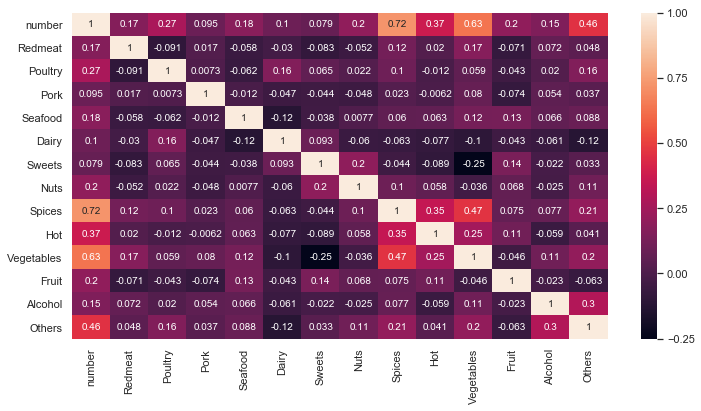

In [45]:
# Obtaining other interesting insight with a correlation heatmap. 
# Recipes with most ingredients will likely have large componenets of vegs and spices.

new_train_1 = new_train.drop(columns = ['ingredients','cuisine', 'Sum', 'id'])
plt.figure(figsize=(12, 6))
sns.heatmap(new_train_1.corr(), annot=True)

## Visualizing the cuisines in a grid    

In [46]:
# Importing the necessaary libraries for PCA and Visualization

from scipy import stats
from sklearn.decomposition import PCA
import time
start_time = time.time()
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

In [47]:
# Fitting our categories into the PCA algorithm projecting from 13 dimensions to 3. 

X = new_train[columns]
pca = PCA(3,whiten = True) 
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [48]:
# Creating a dataframe for easy plotting with the vectors of each PCA

pca_df = pd.DataFrame(pca.transform(X), columns=['PCA%i' % i for i in range(3)],)
pca_df.head(3)

,PCA0,PCA1,PCA2
0,0.581055,2.503627,-1.811574
1,1.124697,1.154074,-0.191561
2,0.106023,-0.069425,0.382777


Text(0.5, 0.92, 'PCA on Engineered Features')

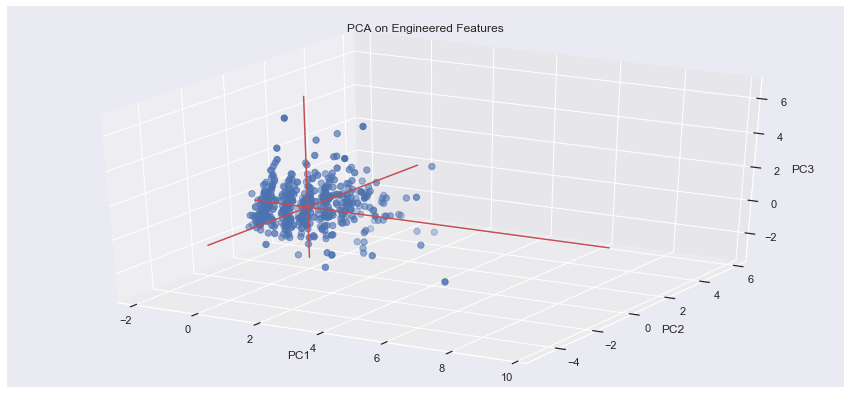

In [49]:
# Plot of 3d graph for visualizing the dataset 

fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PCA0'][0:500], pca_df['PCA1'][0:500], pca_df['PCA2'][0:500], s=40, )
xAxisLine = ((min(pca_df['PCA0']), max(pca_df['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(pca_df['PCA1']), max(pca_df['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(pca_df['PCA2']), max(pca_df['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on Engineered Features")

After applying PCA it becomes apparent that the categories do not do a good job of grouping recipes into clusters, nonetheless we will confirm this after applying two clustering algorithms (DBSCAN and Aglomerattive Clustering). 

In [51]:
# Importing DBSCAN and running the Algorithm
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=3).fit(pca_df)
labels_DBSCAN = db.labels_
print(Counter(labels_DBSCAN))

Counter({0: 39546, -1: 162, 10: 9, 6: 5, 2: 4, 5: 4, 8: 4, 1: 3, 11: 3, 4: 3, 3: 3, 7: 3, 9: 3})


Text(0.5, 0.92, 'DBSCAN TRIAL')

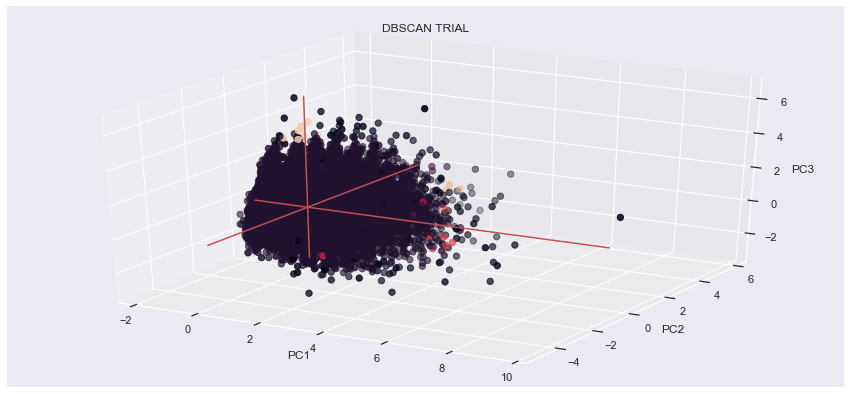

In [52]:
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PCA0'], pca_df['PCA1'], pca_df['PCA2'], s=40, c=labels_DBSCAN )
xAxisLine = ((min(pca_df['PCA0']), max(pca_df['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(pca_df['PCA1']), max(pca_df['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(pca_df['PCA2']), max(pca_df['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("DBSCAN TRIAL")

DBSCAN was tried with several parameters mixing both the eps and min_sample, nonetheless no configuration separated the points into significant groups to create clusters. The eps = 0.5 and min_sample = 3 provides a configuration with a relevant amount of clusters, but as seen in the graph one cluster has more than 95% of the datapoints. An explanation to this could be that DBSCAN deals with density connected points and as the graph shows points are very close together and therefore even at low values of eps (radious of neighborhood)one single clusters will concentrate more than 95% of the data points.     

## Other steps with the Category Strategy
 1. We should improve the categories and clean them to remove noise in them from word search generalizations.
 2. Further EDA should be carried out on the categorized attributes to obtain further valuable insight
 3. ML algorithms for cuisine predictions should be tested to see if accuracy and/or cost improvements are obtained against td/idf strategy. 
